In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimpleNeuralNetwork:
    """
    A neural network implementation from scratch to understand the fundamentals
    This will help you grasp the concepts before moving to frameworks
    """
    
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        
    def sigmoid(self, z):
        """Sigmoid activation function"""
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        """Derivative of sigmoid for backpropagation"""
        return z * (1 - z)
    
    def forward(self, X):
        """Forward propagation"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """Backward propagation - The learning happens here"""
        m = X.shape[0]  # Number of samples
        
        # Calculate gradients for output layer
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Calculate gradients for hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=1000):
        """Train the neural network"""
        losses = []
        
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward propagation
            self.backward(X, y, output)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)

In [3]:
# Example usage and visualization
def create_sample_data():
    """Create a simple dataset for testing"""
    np.random.seed(42)
    X = np.random.randn(100, 2)  # 100 samples, 2 features
    y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)  # Simple decision boundary
    return X, y

In [4]:
def visualize_training():
    """Demonstrate the neural network learning process"""
    X, y = create_sample_data()
    
    # Create and train the network
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
    losses = nn.train(X, y, epochs=1000)
    
    # Plot the loss curve
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    
    # Visualize decision boundary
    plt.subplot(1, 2, 2)
    
    # Create a mesh to plot decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.colorbar(scatter)
    plt.title('Neural Network Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

In [5]:
# Key Concepts Demonstration
def demonstrate_key_concepts():
    """Demonstrate important neural network concepts"""
    print("=== Neural Network Key Concepts ===\n")
    
    print("1. UNIVERSAL APPROXIMATION THEOREM:")
    print("   Neural networks can approximate any continuous function")
    print("   The more neurons/layers, the better the approximation\n")
    
    print("2. GRADIENT DESCENT:")
    print("   We follow the negative gradient to find minimum loss")
    print("   Learning rate controls how big steps we take\n")
    
    print("3. BACKPROPAGATION:")
    print("   Chain rule applied to compute gradients layer by layer")
    print("   Allows efficient training of deep networks\n")
    
    print("4. ACTIVATION FUNCTIONS:")
    print("   Introduce non-linearity (without them, network = linear regression)")
    print("   Common ones: ReLU, Sigmoid, Tanh, GELU\n")
    
    # Demonstrate activation functions
    x = np.linspace(-5, 5, 100)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(x, 1/(1 + np.exp(-x)), label='Sigmoid')
    plt.plot(x, np.tanh(x), label='Tanh')
    plt.plot(x, np.maximum(0, x), label='ReLU')
    plt.title('Common Activation Functions')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    # Show why we need non-linearity
    linear_combo = 0.5 * x + 0.3 * x  # Linear combination
    plt.plot(x, linear_combo, label='Linear Combination')
    plt.plot(x, np.maximum(0, 0.5 * x) + np.maximum(0, 0.3 * x), label='ReLU Combination')
    plt.title('Linear vs Non-linear Combinations')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    # Gradient flow visualization
    sigmoid_grad = (1/(1 + np.exp(-x))) * (1 - 1/(1 + np.exp(-x)))
    relu_grad = (x > 0).astype(float)
    plt.plot(x, sigmoid_grad, label='Sigmoid Gradient')
    plt.plot(x, relu_grad, label='ReLU Gradient')
    plt.title('Gradient Flow')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Starting Neural Network Foundation Training...
=== Neural Network Key Concepts ===

1. UNIVERSAL APPROXIMATION THEOREM:
   Neural networks can approximate any continuous function
   The more neurons/layers, the better the approximation

2. GRADIENT DESCENT:
   We follow the negative gradient to find minimum loss
   Learning rate controls how big steps we take

3. BACKPROPAGATION:
   Chain rule applied to compute gradients layer by layer
   Allows efficient training of deep networks

4. ACTIVATION FUNCTIONS:
   Introduce non-linearity (without them, network = linear regression)
   Common ones: ReLU, Sigmoid, Tanh, GELU



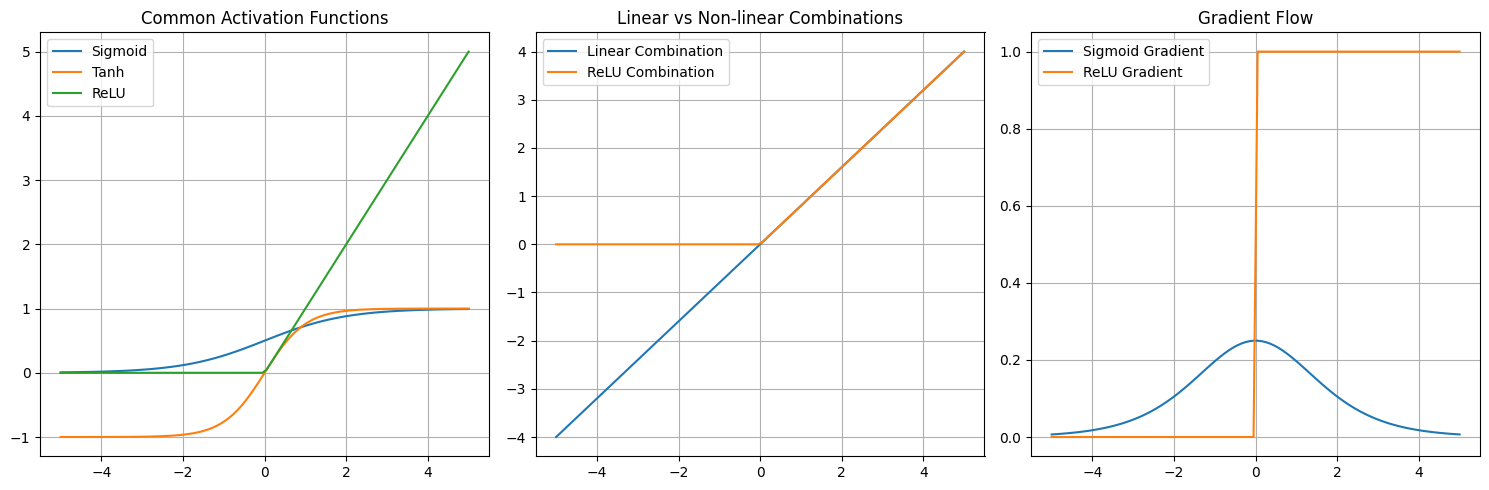


Training a neural network from scratch...
Epoch 0, Loss: 0.2510
Epoch 100, Loss: 0.2459
Epoch 200, Loss: 0.2438
Epoch 300, Loss: 0.2352
Epoch 400, Loss: 0.2077
Epoch 500, Loss: 0.1587
Epoch 600, Loss: 0.1108
Epoch 700, Loss: 0.0779
Epoch 800, Loss: 0.0580
Epoch 900, Loss: 0.0458


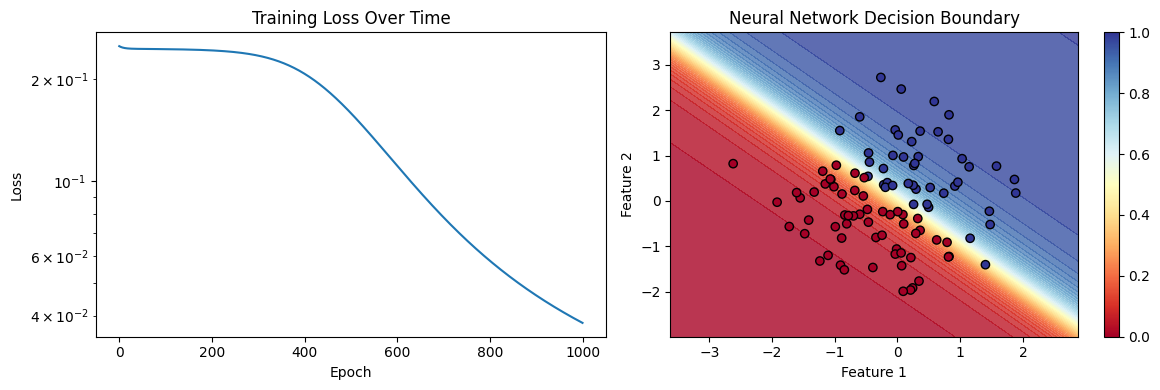


Foundation complete! You now understand the core mechanics.


In [6]:
if __name__ == "__main__":
    print("Starting Neural Network Foundation Training...")
    demonstrate_key_concepts()
    print("\nTraining a neural network from scratch...")
    visualize_training()
    print("\nFoundation complete! You now understand the core mechanics.")